<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/TF22_0_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2024-06-16 12:48:37--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2024-06-16 12:48:37 (37.2 MB/s) - ‘moore.csv’ saved [2302/2302]



In [3]:
# load in the data
data = pd.read_csv('moore.csv', header=None).values
X = data[:, 0].reshape(-1, 1) # make it a 2-D array of size N x D where D = 1
Y = data[:, 1]

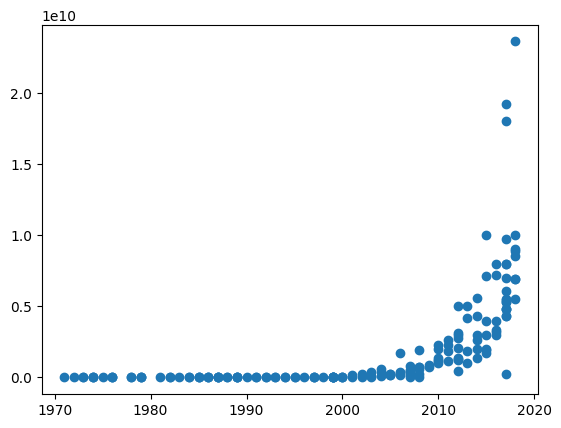

In [4]:
# Plot the data - it is exponential!
plt.scatter(X,Y)

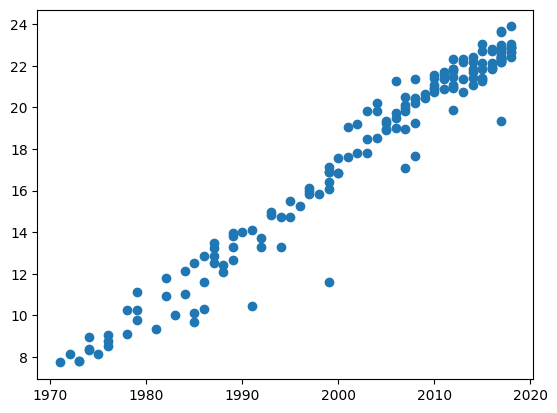

In [5]:
# Since we want a linear model, let's take the log
Y = np.log(Y)
plt.scatter(X,Y)
# that's better

In [6]:
# Let's also center the X data  so the values are not too large
# We could scale it too butthen we' d have to reverse the transfrmation later
X = X  -  X.mean()

In [7]:
# Now create our Tensorflow model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
# model.compile(optimizer='adam', loss='mse')

#  learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)
    #Train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 20ms/step - loss: 440.5836 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 20ms/step - loss: 355.1726 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 14ms/step - loss: 267.0792 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 11ms/step - loss: 198.0868 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 198.7052 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 234.3418 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 5ms/step - loss: 186.4140 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 10ms/step - loss: 148.4905 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 20ms/step - loss: 66.5494 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 8ms/step - loss: 42.0053 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 14ms/step 

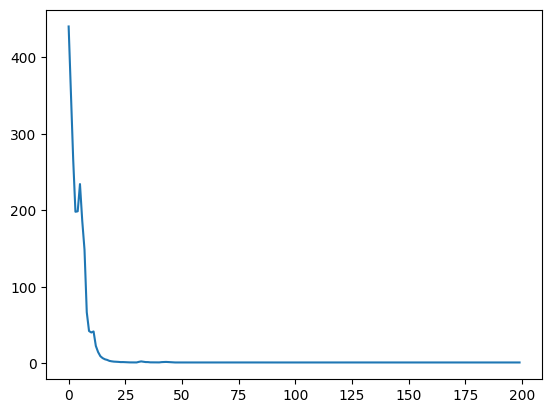

In [8]:
plt.plot(r.history['loss'], label='loss')

In [9]:
# Get the slope of the line
# The slope of the line is related to the doubling rate of transistor count
print(model.layers) # Note: there is only 1 layer, the "Input" layer dosen't count
print(model.layers[0].get_weights())

[array([[0.33694857]], dtype=float32), array([17.760483], dtype=float32)]


In [10]:
# The slope of the line is:
a = model.layers[0].get_weights()[0][0,0]

In [11]:
print('Time to double', np.log(2)/a)

Time to double 2.0571304789221556


In [12]:
# if you know the analytical solution
X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) / denominator)
print(a, b)
print('Time to double:', np.log(2) / a)

0.341682487387313 536033.5789372206
Time to double: 2.0286295205239204


Part 2

#The Neuron

Lets talk about the models we learned more indepth
##Linear Regression for regression
##Logistiic Regression for classification

#Part 2: Making Predictions

6/6 [==============================] - 0s 2ms/step


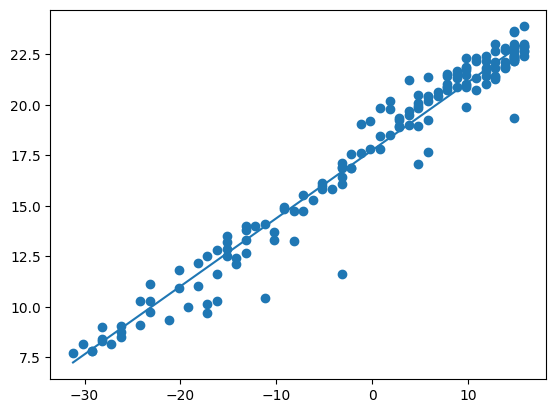

In [15]:
# Make predictions
Yhat  = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)


In [16]:
# Manual calculation

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X because we flattened it again earlier
X = X.reshape(-1, 1)

#  (N x 1) x (1 x 1 ) + (1) --> (N x 1)
Yhat2 = (X.dot(w) + b).flatten()

# Don't use == for floating points
np.allclose(Yhat, Yhat2)

True